In [1]:
!pip install tensorflow matplotlib seaborn

In [2]:
# =====================================
# Title: Feedforward Neural Network on CIFAR-10 Dataset (CSV version)
# =====================================

# a. Import required packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# b. Load the training and testing data
# =====================================

# Load CSV files (update file paths)
train_df = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\CIFRAssn2&3\train_data.csv")
test_df  = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\CIFRAssn2&3\test_data.csv")



Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


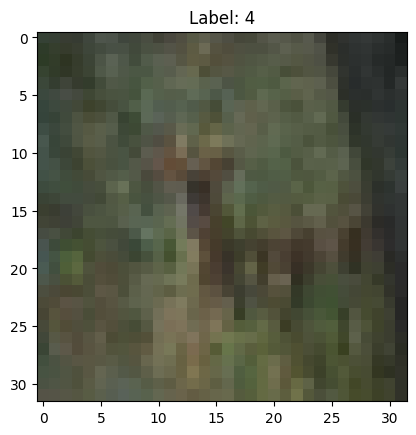

In [3]:
# Separate features (pixels) and labels (last column)
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Each CIFAR-10 image = 32 x 32 x 3 = 3072 pixels
x_train = x_train.reshape(-1, 32, 32, 3)
x_test  = x_test.reshape(-1, 32, 32, 3)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Display dataset details
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

# Display one sample image
plt.imshow(x_train[10])
plt.title(f"Label: {y_train[10]}")
plt.show()

In [4]:
# =====================================
# c. Define the network architecture
# =====================================
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()

# =====================================
# d. Compile the model
# =====================================
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\ProgramData\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
352/352 - 11s - 32ms/step - accuracy: 0.3082 - loss: 1.9059 - val_accuracy: 0.3496 - val_loss: 1.7794
Epoch 2/15
352/352 - 7s - 20ms/step - accuracy: 0.3901 - loss: 1.6973 - val_accuracy: 0.4036 - val_loss: 1.6708
Epoch 3/15
352/352 - 7s - 20ms/step - accuracy: 0.4268 - loss: 1.6041 - val_accuracy: 0.4246 - val_loss: 1.6325
Epoch 4/15
352/352 - 7s - 20ms/step - accuracy: 0.4472 - loss: 1.5470 - val_accuracy: 0.4516 - val_loss: 1.5422
Epoch 5/15
352/352 - 7s - 21ms/step - accuracy: 0.4629 - loss: 1.5029 - val_accuracy: 0.4486 - val_loss: 1.5434
Epoch 6/15
352/352 - 7s - 21ms/step - accuracy: 0.4752 - loss: 1.4678 - val_accuracy: 0.4548 - val_loss: 1.5126
Epoch 7/15
352/352 - 8s - 23ms/step - accuracy: 0.4865 - loss: 1.4418 - val_accuracy: 0.4778 - val_loss: 1.4737
Epoch 8/15
352/352 - 8s - 22ms/step - accuracy: 0.4957 - loss: 1.4082 - val_accuracy: 0.4842 - val_loss: 1.4603
Epoch 9/15
352/352 - 7s - 21ms/step - accuracy: 0.5063 - loss: 1.3794 - val_accuracy: 0.4862 - val_loss

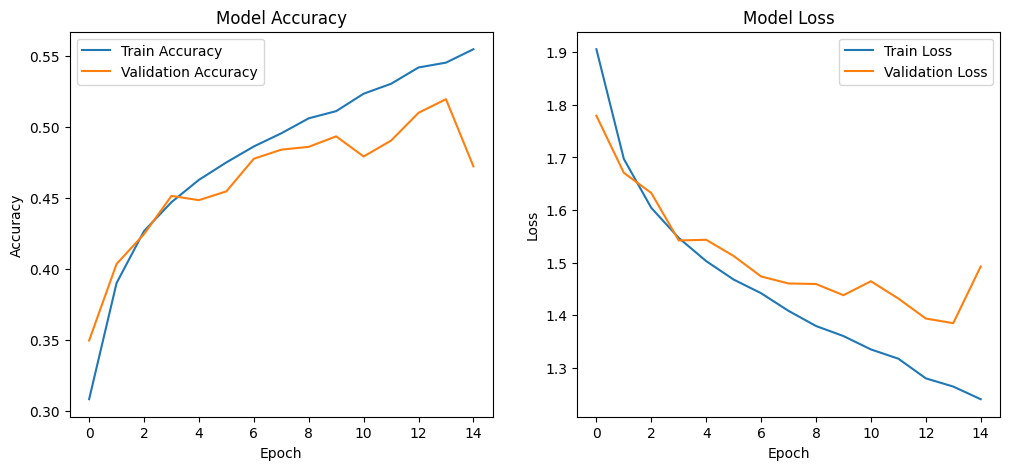

<Axes: >

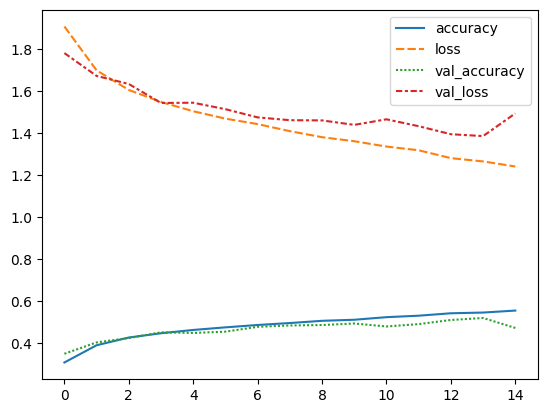

In [5]:
# =====================================
# e. Train the model
# =====================================
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# =====================================
# f. Evaluate the model
# =====================================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"\nTest Loss: {test_loss:.4f}")


# =====================================
# g. Plot training loss and accuracy
# =====================================
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Optional seaborn visualization
sns.lineplot(data=history.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


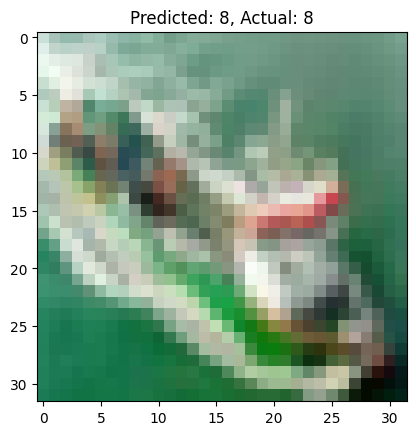

In [6]:
# =====================================
# f. Display Prediction Example
# =====================================

predictions = model.predict(x_test)
index = 15
plt.imshow(x_test[index])
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()